<a href="https://colab.research.google.com/github/COGS118A/Group016-SP23/blob/main/DataCheckPoint_Group016_SP23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118A- Project CheckPoint

# Names

- Yutong Guo
- Yuxuan Che
- Ethan Hu
- Qilun Liu
- Zhihan Li


# Abstract 
The hypothesis of this study is that by utilizing a dataset consisting of 21 diabetes health indicator variables, including quantitative measurements such as BMI, high blood pressure, and high cholesterol, we can make accurate predictions on effectively distinguishing between diabetic and non-diabetic individuals. Our goal is to analyze the dataset as it includes survey responses from diabetes or non diabetes individuals, through 21 variables encompassing health, physical or mental information. The aim is to leverage machine learning algorithms to classify individuals as diabetic or non-diabetic based on the given variables. Gradient Boosting and random forest algorithms will be employed to train and evaluate the models using the dataset, while accuracy, recall rates, and F1-scores will be measured and compared to determine the best performing algorithm for diabetic classification.

# Background

Before we fully made the consensus on choosing diabete health indicators as variables on examining diabetic and non-diabetic groups as our aimed research topic, we discussed among the topics about student life. As UCSD international students who have positive attitudes toward learning and living, we should be aware of how to emphasize physical and mental health without compromising learning status. According to prior outside research, by a proper estimation in 2017, about 451 million adults who suffered from diabetes worldwide, and by the current trend of living style, such numbers were expected to increase to 693 million by 2045<a name="Gastaldelli"></a>[<sup>[1]</sup>](#Gastaldelli). Among the existing file-contained cases, it was estimated that 49.7% of the patients who lived with diabetes are undiagnosed until it’s too late. As a lifelong problem, there are two types of diabetes that we are currently worrying about: type I and type II diabetes. For type I, unfortunately, there exists no direct prevention method that can observe it or avoid it from getting worse; while for type II diabete, some symptom data measurement such as BMI, high blood pressure, and high cholesterol can be used as proper detection factors. From what we predicted before doing the classification, the reason that such a huge portion of patients who got obvious traits of having type II diabetic but still refuse to get proper examination is because they are afraid of getting worse after the screening test is complete on both physical and mental ways; however, as what The USPSTF found as inadequate direct evidence, screening for type 2 diabetes or prediabetes leads to improvements in mortality or cardiovascular morbidity<a name="Force"></a></a>[<sup>[2]</sup>](#Force). Therefore, it seems not a bad idea to take screen tests oftenly. Even if we are unable to get formal screen tests for detection, the easiest way to determine whether an individual is within diabetic or nondiabetic group is on blood sugar level as it is controlled by insulin which is a hormone produced by pancreas<a name="PharmEasy"></a>[<sup>[3]</sup>](#PharmEasy). 


After going through these informations regarding diabetic symptoms, we realize that the reason to demonstrate interests on diabete health indicators is that we are curious on what contributes to the formation of type II diabetic and want to distinguish between diabetic and non diabetic groups. It is essential on trying to examine proper methods to prevent people from being diagnosed as diabetic diseases before it’s too late since long-term complications of diabetes develop gradually. The longer you have diabetes — and the less controlled your blood sugar — the higher the risk of complications. Thus, our goal is to help people to better classify themselves as diabetic or non-diabetic groups, and specifically tell them on what factors have higher possibility on causing diabetic behaviors than others. 


# Problem Statement

Whether or not diabetic patients can be accurately distinguished from non-diabetic people, depending on variables including personal and external factors. And what combinations of the algorithm and variables are working most efficiently. This is a binary classification problem, and the accuracy will be accessed by various evaluation matrices. This study is quantifiable, measurable, and replicable since we are using binary output from different machine learning models to quantify whether an individual is high-risk to diabetes, the performance of different models can be measured using precision-recall rate and f1 score, and all data can be found in open source for others to replicate the study.

# Data

Link to data: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

This dataset contains 21 diabetes health indicator variables with 70k valid observation data. Each observation is a survey response from a non/diabetes person responding to the questions which is later cleaned and labeled into the 21 different variables, the variables include health and demographic information like: BMI, stoke, smoker, fruit, veggies, general, mental, physical health, age, sex, etc. Some of the critical variables are high blood pressure (binary), high cholesterol (binary), age (ratio), consume vegetables 1 or more times per day (binary), income rated from 1-10 interval (interval), etc. These are some of the more important variables that might have a larger influence on whether a person gets diabetes. There are 2 types of result data: non/diabetes, and we are hoping to build a model using binary classification. The original survey includes more observations, but we choose to use this dataset, since this dataset is balanced with same number of diabetic patients and non-diabetic people. Otherwise, all the data is cleaned, and all categorical data are already transferred to numerical ones using one-hot-encoding. 


After data cleaning, we chose to set up as follows:

Size of the dataset: 70691 sample sizes in total, with the possibility of outliers involved. 

Observation: Each observation in this dataset represents a person who aged between the range from 18 to 80 or older about his physical behavior. 

Critical Variables: Among the 21 variables, we specificaly focus on 'HighBP', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'Age'. So 6 critical variables. 

Special Handling/Transformations/Cleaning: We normalized all the data entries into the scale between 0 to 1. 

Data Preprocessing and cleaning: we wanna use L2 norm to demonstrate our feature, and some of the variables' need to switch to binary output. 





In [ ]:
# setup
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# load balanced diebetes binary dataset
url = "https://raw.githubusercontent.com/COGS118A/Group016-SP23/main/diabetes50.csv"
df = pd.read_csv(url)
diabetes=(df-df.min())/(df.max()-df.min())
diabetes



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


# Proposed Solution

There should be a clear distinction between diabetic patients and non-diabetic people, and it should have a high precision rate, recall rate, and f1 score for generally all classification machine learning methods, since there are large enough variables and observations for learning.
Logistic regression should work well, but the linearity between variables and result indices are not checked, which may lead to inaccurate results. The precision rate ,recall rate and f1 score will be examined and compared among different models. 
This solution is applicable to all American people. Because this dataset only contains data on a national base. This dataset is large enough to be representative to all populations contained in the dataset. Since all indicators we are using are important health indicators, the solutions should have a true meaning and be applicable. 

# Evaluation Metrics

Since our project aims to build a machine learning model that can correctly identify individuals that are considered high-risk in getting diabetes, we want to have a high accuracy, but also since we do not want to miss anyone who has diabetes, one of the most important metrics for our project is the Recall rate. Recall = TP / (TP + FN), where we want to identify as much positive as possible among the population. Thus, we want to compare our model’s Recall rate with the benchmark model to analyze if there is a significant improvement in the model. Although Recall score is extremely important as an evaluation metric, we also want to put some emphasis on precision as well. Precision = TP / (TP + FP), it measures the proportion of correctly predicted positive instances (diabetics) out of all instances predicted as positive.  
Since both metrics are important, we can combine them to produce a f1 score test as our final evaluation metrics. F1 Score = 2 * (Precision * Recall) / (Precision + Recall), it combines precision and recall into a single metric, providing a balanced measure of a model's performance. Thus, this can be one of the more ideal metrics for our project.
To test the metrics, since there is a large enough data, we plan to use the regular Train/Validate/Test split for both our model and the benchmark model and compare the f1 score for both models. We hope to see a higher f1 score from our model compared to the benchmark model. 

# Preliminary Result 

First, we used support vector machine with a L2 norm penalty to complete feature selection, as shown by the code below:

### Feature Selection

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Diabetes_binary'], diabetes["Diabetes_binary"], test_size=0.33)

# apply L2 norm on feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False, max_iter=10000).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_train.shape, X_new.shape

# assign feature names to selected feature set
names = X_train.columns.values.tolist()
feature_idx = model.get_support()
filtered_list = [i for (i, v) in zip(names, feature_idx) if v]
X_new = pd.DataFrame(data = X_new, columns = filtered_list).reset_index(drop=True)
X_test = X_test[filtered_list]

# print selected train set
X_new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,HighBP,CholCheck,BMI,HvyAlcoholConsump,GenHlth,Age
0,1.0,1.0,0.290698,0.0,0.25,0.500000
1,0.0,1.0,0.232558,0.0,0.25,0.250000
2,0.0,1.0,0.220930,0.0,0.25,1.000000
3,0.0,1.0,0.209302,0.0,0.25,0.750000
4,0.0,1.0,0.244186,0.0,0.75,0.583333
...,...,...,...,...,...,...
47358,1.0,1.0,0.255814,0.0,1.00,0.666667
47359,0.0,1.0,0.197674,0.0,0.75,0.750000
47360,1.0,0.0,0.139535,0.0,0.00,0.583333
47361,0.0,1.0,0.209302,0.0,0.25,0.083333


Then we used grid search cross validation for parameter selection within the 5 potential algorithms: random forest, gradient boosting, support vector machines, logistic regression and naive bayes, an example of how its done is shown

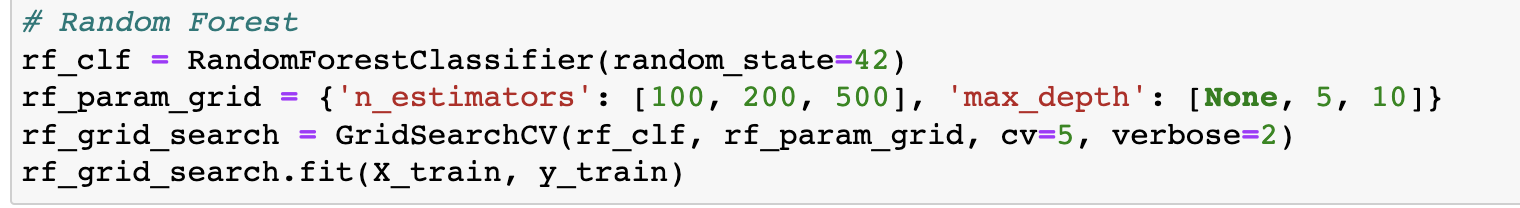

Later we compared the scores of different algorithms as shown below:

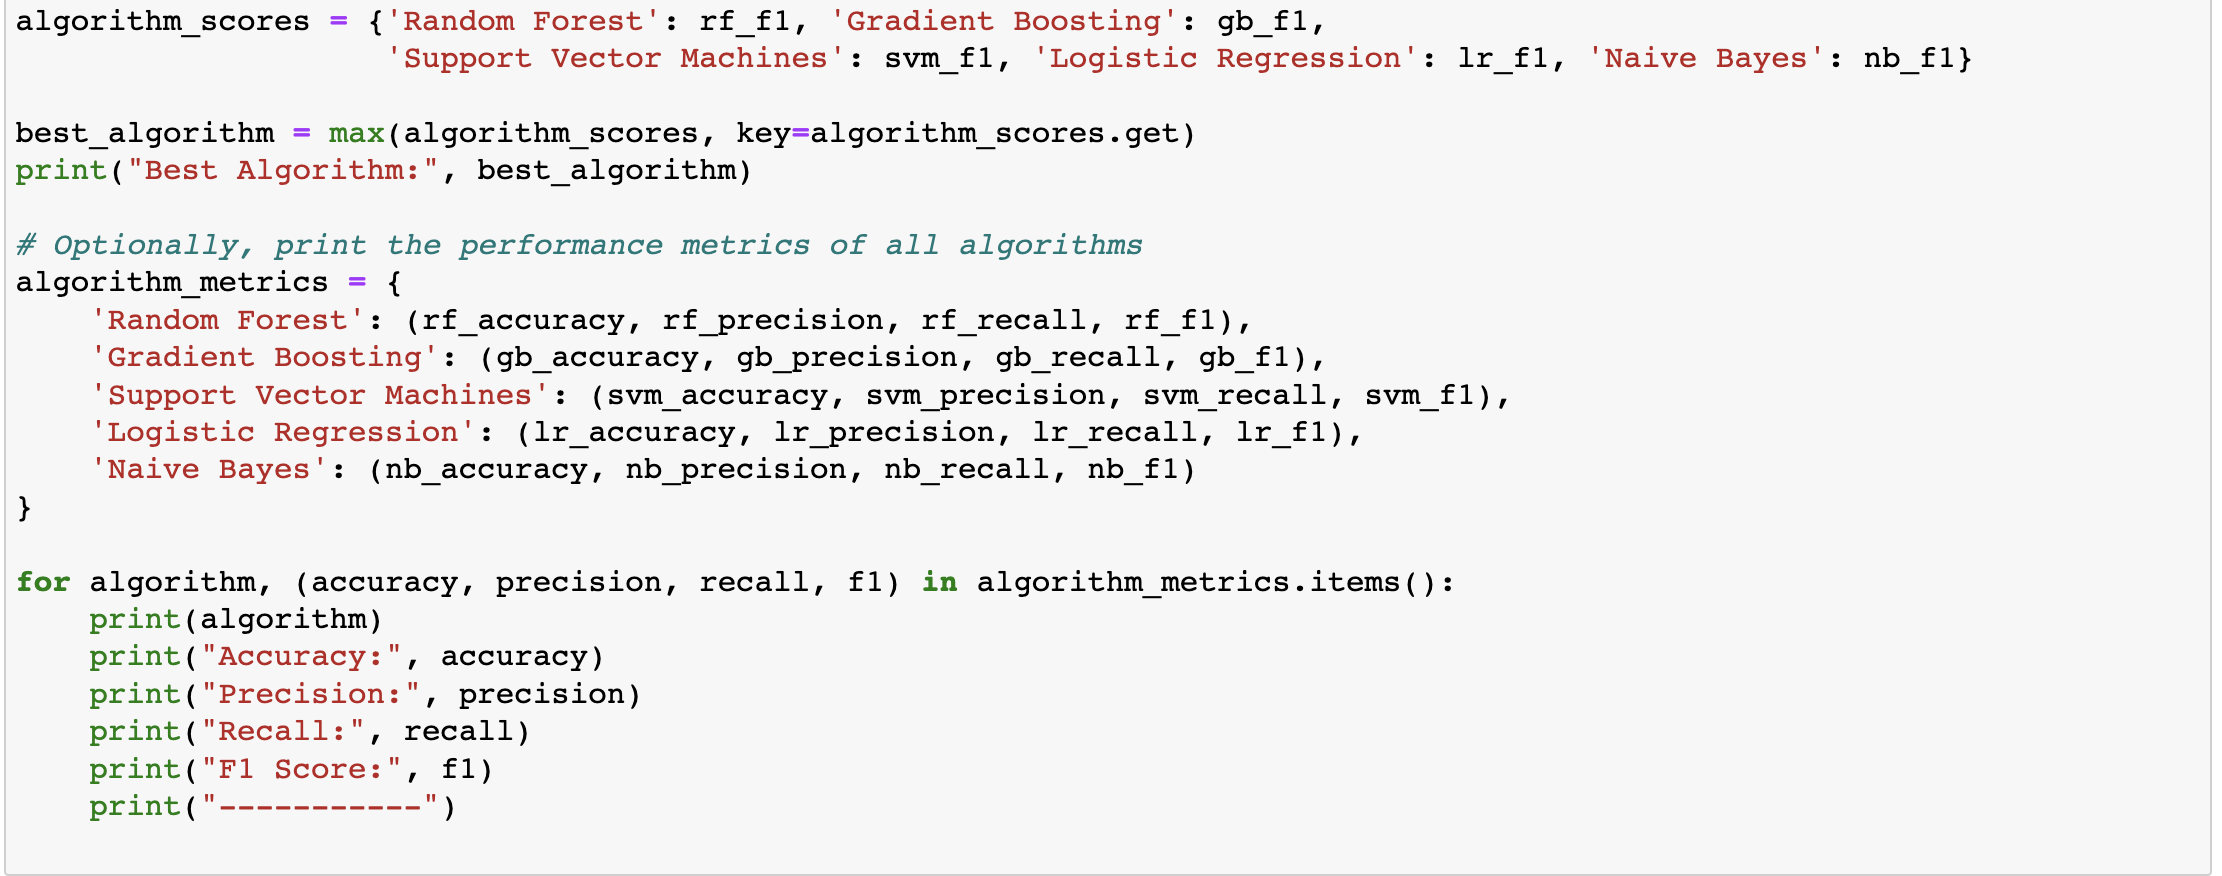

# Classification report

Here are the results from different algorithms, and a confusion matrix of the current best algorithm:

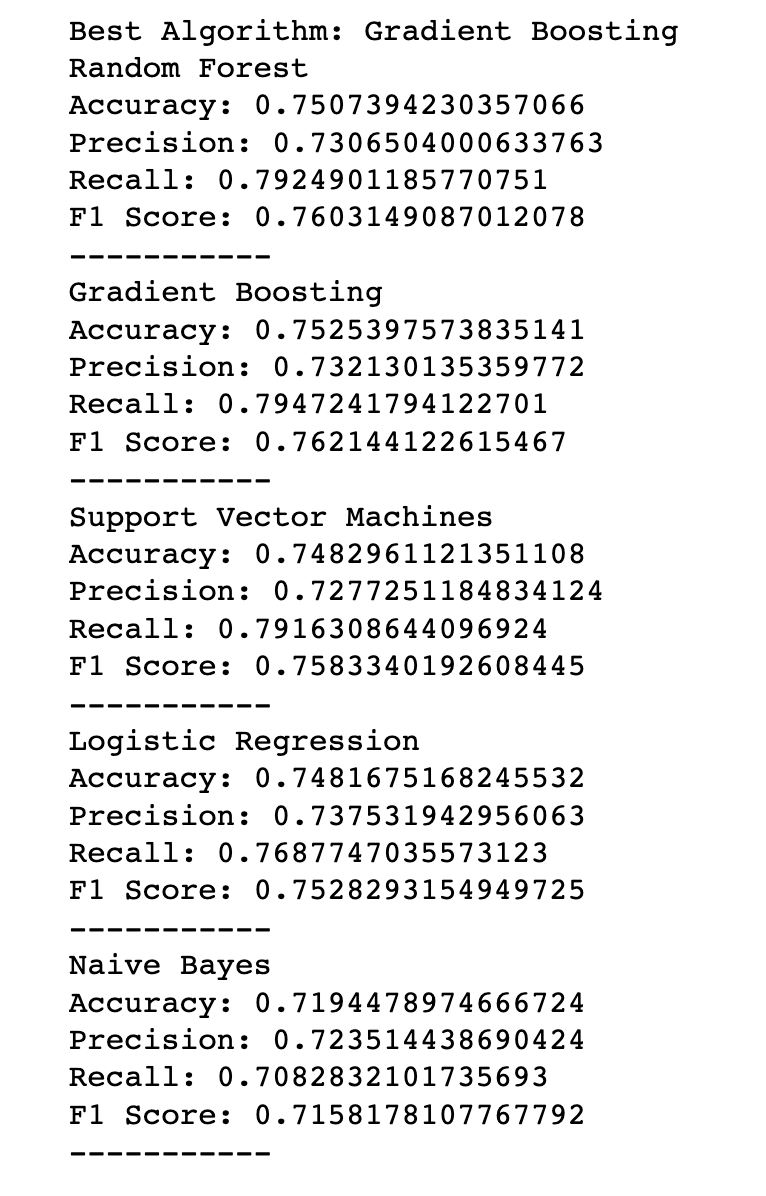

### Confusion Matrix

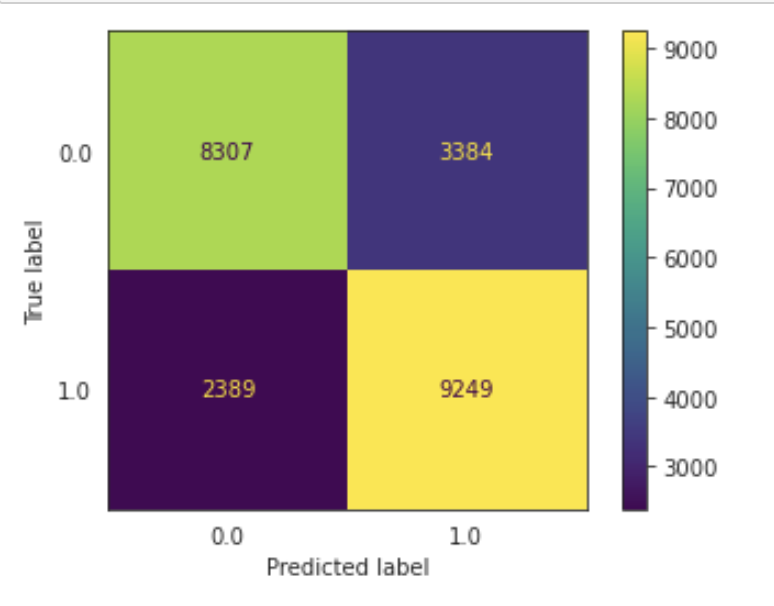

# Ethics & Privacy

<b>Tracing Data Source</b> <br>
The data we will be using to construct the model is a cleaned dataset retrieved from Kaggle. To ensure reliability and address any potential ethical issue that might involve in this dataset, we traced its origin back to the Centers for Disease Control and Prevention (CDC). According to the acknowledgment section provided on Kaggle, the CDC released the original version of this dataset in 2015. 

Based on the description on CDC's official site, the data within this dataset is collected through the Behavioral Risk Factor Surveillance System (BRFSS) questionnaire. BRFSS is a “health-related telephone survey that collects state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services”, according to CDC.

<b>Potential Ethical Concern I: Unrepresentative Sampling Data</b> <br>
One of the ethical concerns related to health data-based machine learning algorithms is the use of unrepresentative samples. According to CDC, the survey data is mainly collected through telephone calls. We would concern data collected in this way might fail to represent people who are unable to answer phone calls due to various limitations. This limitation could arise from factors such as working hours, lacking access to telephones or cell phones, or other circumstances. 

This exclusion may lead to a biased representation of certain demographics of the population. If the training data used for developing the algorithms is not a sufficient representation of the diverse population, it can lead to biased and inaccurate predictions. A recommendation suggested by such a biased algorithm could disproportionately affect certain demographic groups and cause healthcare disparities. 

In the aim to prevent and address unintended consequences arising from unrepresentative samples, it is important to be transparent about our choice of data, the criteria for excluding or including certain data points, and the methods we used to construct the algorithm. We believe by revealing sufficient details to the public, we could help the public to make informed decisions when using our algorithm and interpreting the results it generates. Furthermore, by disclosing our modeling process and methodology, we invite feedback and criticism from the public and other stakeholders. In such a collaborative environment, we believe that potential issues could be identified more quickly, which allows improvements to be made more promptly. 


<b>Potential Ethical Concern II: Model Fairness Across Groups</b> <br>
Another common concern for a machine learning algorithm is whether the model acts fairly across different groups. This issue may also lie in our model construction. Since the data we have chosen is from a single source, any misrepresentation within the data sampling could expose our model to the risk of overfitting. Therefore, before publishing the algorithm, it is important to test whether our model’s predictions are unbiased for any demographic or population group. 
In addition to conducting thorough testing, we believe providing the public with our error metrics is necessary. In such a report, we should include metrics such as accuracy, false positive rate, and other relevant measure. By sharing this information, we aim to enhance public understanding of the characteristics and limitations inherent in our model.

<b>Potential Ethical Concern III: Transparency and Explainability</b> <br>
It is also important to ensure that our data is diverse, and free from biase. Therefore, in order to understand how the algorithm arrives at its predictions and classfication, we need to make sure the model interpretability and feature analysis could provide explnations for the algorithm's decisions, which can provide enough transparency in the our final decion making.


# Team Expectations 

- The main communication channel for our team will be WeChat and Zoom. Each team member is expected to actively contribute to the group discussion and promptly confirm the availability for any meeting. 
- Respecting each other is important. Each team member is expected to be inclusive and value any thought or concern others may have. If conflicting ideas emerge, be sure the discussion focuses on the issue rather than the person. 
- Once a meeting schedule is set, each member of the team is expected to show up on time. However, we do understand that emergent situations may occur. In case of an unexpected not-showing-up, we expect each team member to inform each other at their earliest convenience.
- Each member is expected to contribute evenly to this project. If any member has concerns about fairness, open discussion is strongly encouraged. Our best hope is that any concern could be resolved within the team. However, if the issue couldn't be resolved on a team level, we would consult staff members as soon as possible.
- Merging different members' work into a single file on GitHub could be stressful. To prevent possible merging conflict, our team agrees to draft out the framework on Google Docs before pushing. Once all members have completed their part(s) on Google Docs, we would consider letting one member of the team push the content in Google Docs onto Github. This role may be designated to a single member throughout the quarter or a shifting role that each member takes turns doing.
- Although, for convenience, each member may have specialized responsibilities on different parts of the project, combining different sections of the project is a role that everybody shares. Each member is expected to take the responsibility of integrating their part(s) of the work into the group project, as well as reviewing and tuning the project before the final submission.
- Upon receiving a grade for a checkpoint or the project, some parts of the work may need further improvement. Although points might be deducted from some parts of the project but not others, everybody is responsible for the grade received since everyone has agreed before the final push. We encourage the member who contributed more to the parts where point(s) has been deducted to bring up ideas for revision (if given a chance). However, we agree that it is everyone’s responsibility to refine the work if we wish to improve the grade.


# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/16  |  6:30 PM |  Brainstorm topics/questions, create shared google doc| Introduction, Discuss work separation, finding data, finding possible hypotheses based on data, sharing thoughts, making a schedule for following meetings. | 
| 5/17  |  6:30 PM |  Read everyone’s writing | Double check everyone’s work and make sure no one has any problem. | 
| 5/23  | 6:30 PM  | Check grades, and read comments  | Discuss if there’s any improvement need for the proposal.   |
| 5/29  | 7:00 PM  | Discuss specific norm and matrix we will use  | Clean the data and code, review our previous writing and modefy our project   |
| 5/30 | 6:30 PM  | Data cleaning | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 6/5 | 6:30 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project  |


# Footnotes

 <a name="Gastaldelli"></a>1.[^](#lorenz): A;, Gastaldelli. “Role of Beta-Cell Dysfunction, Ectopic Fat Accumulation and Insulin Resistance in the Pathogenesis of Type 2 Diabetes Mellitus.” Diabetes Research and Clinical Practice, pubmed.ncbi.nlm.nih.gov/21864753/. Accessed 17 May 2023.<br>
  <a name="Force"></a>2.[^](#Force): Force, US Preventive Services Task. “USPSTF RECOMMENDATION: Screening for Prediabetes and Type 2 Diabetes.” JAMA, 24 Aug. 2021, jamanetwork.com/journals/jama/fullarticle/2783414.<br>
 
<a name="PharmEasy"></a>3.[^](#PharmEasy): “What Is the Chief Difference between People with Diabetes and People without Diabetes? What Is the Chief Difference between People with Diabetes and People without Diabetes?” PharmEasy Blog, 18 Aug. 2021, pharmeasy.in/blog/what-is-the-chief-difference-between-people-with-diabetes-and-people-without-diabetes/#:~:text=The%20chief%20difference%20is%20the,this%20is%20called%20insulin%20resistance. 
